In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abodalgodimy","key":"6cf4cd1cb79502eb44f832e869f24239"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir -p /content/data
!kaggle datasets download -d umairshahpirzada/traffic-net -p /content/data --unzip

Dataset URL: https://www.kaggle.com/datasets/umairshahpirzada/traffic-net
License(s): unknown
  0% 0.00/48.4M [00:00<?, ?B/s]
100% 48.4M/48.4M [00:00<00:00, 836MB/s]


In [ ]:
!ls data/trafficnet_dataset_v1

test  train


In [38]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train_dir = "data/trafficnet_dataset_v1/train"
test_dir = "data/trafficnet_dataset_v1/test"

In [40]:
class_names = sorted(os.listdir(train_dir+"/"))
n_classes = len(class_names)
class_dis = [len(os.listdir(train_dir+"/" + name)) for name in class_names]
print(f"Total Number of Classes : {n_classes} \nClass Names : {class_names}")
print(f"female : {class_dis[0]} \nmale : {class_dis[1]}")

Total Number of Classes : 4 
Class Names : ['accident', 'dense_traffic', 'fire', 'sparse_traffic']
female : 900 
male : 900


In [41]:
valid_dis = [len(os.listdir(test_dir+"/" + name)) for name in class_names]

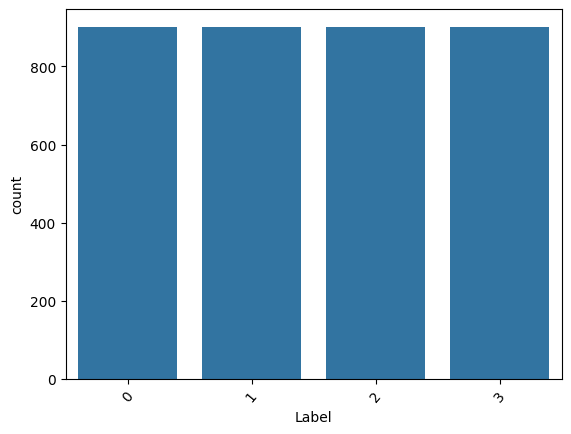

In [42]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [43]:
BATCH_SIZE = 32
NUM_CLASSES = 2
IMAGE_SIZE = (224, 224)
validation_split = 0.2
train_dir =image_data
MIXUP_PROB = 0.3
CUTMIX_PROB = 0.3
CUTOUT_PROB = 0.3
LABEL_SMOOTHING = 0.1

# إعدادات التدريب على مرحلتين
WARMUP_EPOCHS = 5
FINETUNE_EPOCHS = 20
WARMUP_LR = 1e-3
FINETUNE_LR = 1e-5

In [44]:

data_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=50.0,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',

)
test_datagen = ImageDataGenerator(
    rescale=1./255
)
train_gen = data_datagen.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=IMAGE_SIZE,
    #color_mode="grayscale",
    class_mode='categorical',
    shuffle=True,
    seed=100,
)
test_gen = test_datagen.flow_from_directory(
    "data/trafficnet_dataset_v1/test",
    batch_size=BATCH_SIZE,
    target_size=IMAGE_SIZE,
    #color_mode="grayscale",
    class_mode='categorical',
    shuffle=False,
    seed=200,
)

Found 3600 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [45]:
class_names = list(train_gen.class_indices.keys())
class_names

['accident', 'dense_traffic', 'fire', 'sparse_traffic']

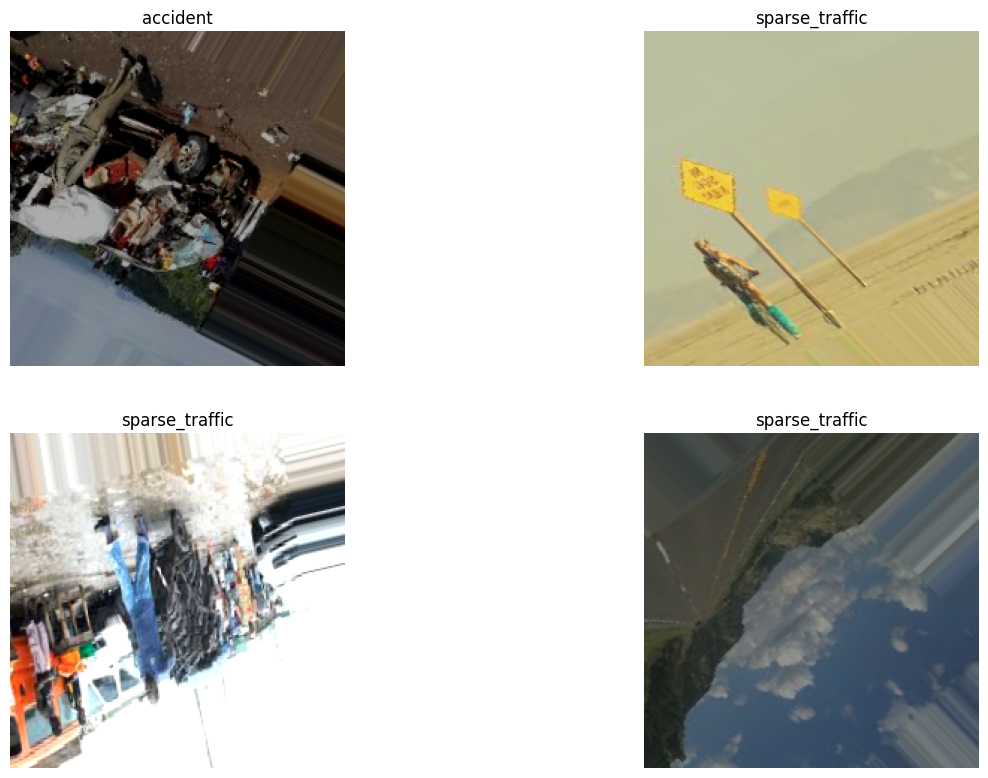

In [46]:

images, labels = next(train_gen)

plt.figure(figsize=(15, 20))
for i in range(4):
    ax = plt.subplot(4, 2, i + 1)
    plt.imshow((images[i] * 255).astype("uint8"))


    title = class_names[np.argmax(labels[i])]

    plt.title(title)
    plt.axis("off")

In [47]:

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))

In [48]:
steps_per_epoch = train_gen.samples // train_gen.batch_size
validation_steps = test_gen.samples // test_gen.batch_size
steps_per_epoch

112

In [51]:
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Dropout, Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [54]:
input_ten = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_model = MobileNet(include_top=False, input_tensor=input_ten)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)
model = Model(inputs=input_ten, outputs=x)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,232,964 (12.33 MB)

 Trainable params: 3,211,076 (12.25 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [55]:

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5),
    ModelCheckpoint("best_resnet50.h5", save_best_only=True)
]

In [56]:



history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=40, #
    validation_data=test_gen,
    class_weight=class_weights,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/40
 11/112 ━━━━━━━━━━━━━━━━━━━━ 11:19 7s/step - accuracy: 0.3103 - loss: 1.8781

KeyboardInterrupt: 

In [ ]:
score, acc = model.evaluate(test_gen)
print('Test Loss =', score)
print('Test Accuracy =', acc)

In [ ]:
model.save('/content/drive/MyDrive/MobileNet_model.keras')

In [ ]:
import pickle

with open('/content/drive/MyDrive/MobileNet_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)